In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import collections

%matplotlib inline

C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\felipe.figueiredo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
# Reset the pseudo random number generator to the same value.
np.random.seed(1012019)

In [3]:
def moving_average(val, d):
    d.appendleft(val)
    #print(d)
    avg = sum(d)
    #print(avg)
    return avg

In [4]:
# Define the number of examples.
M = 1000

# Generate target function.
x1 = np.random.randn(M, 1)
x2 = np.random.randn(M, 1)

# True function.
y = x1 + x2

# Noisy function.
y_noisy = y + np.random.randn(M, 1)

In [5]:
# Generate values for parameters.
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y_noisy - yhat))

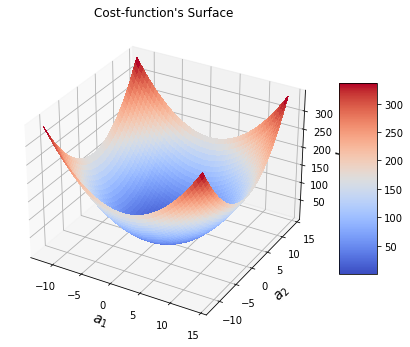

In [6]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14);
plt.title('Cost-function\'s Surface')
#plt.savefig("error_surface_sgd.png", dpi=600)
#Show the plot.
plt.show()

In [7]:
# Concatenate both column vectors, x1 and x2.
X = np.c_[x1, x2]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))
yhat = X.dot(a_opt)
Joptimum = (1.0/M)*np.sum(np.power((y_noisy - yhat), 2))

In [14]:
# Number of epochs.
n_epochs = 1
# Constant learning rate.
alpha = 0.003

# Random initialization of parameters.
a = np.array([-10.0, -10.0]).reshape(2, 1)

# Create vector for parameter history.
a_hist = np.zeros((2, n_epochs*M+1))
# Initialize history vector.
a_hist[:, 0] = a.reshape(2,)

# Create array for storing error values.
Jgd = np.zeros(n_epochs*M+1)

Jgd[0] = (1.0/M)*sum(np.power(y_noisy - X.dot(a), 2))

# Instantiate circular buffer.
d = collections.deque(maxlen=5)

mv_avg = True

# Stocastic gradient-descent loop.
grad_hist = np.zeros((2, n_epochs*M))
update_hist = np.zeros((2, n_epochs*M))
for epoch in range(n_epochs):
    for i in range(M):
        random_index = np.random.randint(M)
        xi = X[random_index:random_index+1]
        yi = y_noisy[random_index:random_index+1]
        
        gradient = -2.0*xi.T.dot(yi - xi.dot(a))
        
        if(mv_avg==True):
            grad = moving_average(gradient, d)
        else:
            grad = gradient
        
        update = alpha * grad
        a = a - update
        
        Jgd[epoch*M+i+1] = (1.0/M)*sum(np.power((y_noisy - X.dot(a)), 2))
        
        grad_hist[:, epoch*M+i] = gradient.reshape(2,)
        update_hist[:, epoch*M+i] = update.reshape(2,)
        a_hist[:, epoch*M+i+1] = a.reshape(2,)

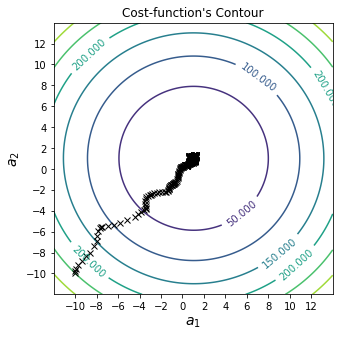

In [15]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, :], a_hist[1, :], 'kx')
plt.xticks(np.arange(-10, 14, step=2.0))
plt.yticks(np.arange(-10, 14, step=2.0))
#plt.savefig("error_contour_sgd.png", dpi=600)
plt.show()

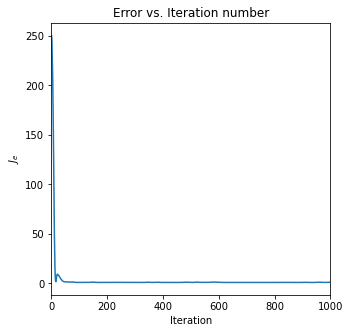

In [10]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, n_epochs*M), Jgd[0:n_epochs*M])
plt.xlim((0, n_epochs*M))
#plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
#plt.savefig("error_vs_iteration_bgd.png", dpi=600)
plt.show()

In [11]:
# Print found values.
print('a1_opt: ' + str(a_opt[0, 0]))
print('a2_opt: ' + str(a_opt[1, 0]))

print('a1_sgd: ' + str(a[0, 0]))
print('a2_sgd: ' + str(a[1, 0]))

a1_opt: 1.0391314618233058
a2_opt: 1.019522855508552
a1_sgd: 0.6100303794741808
a2_sgd: 1.061597458115092


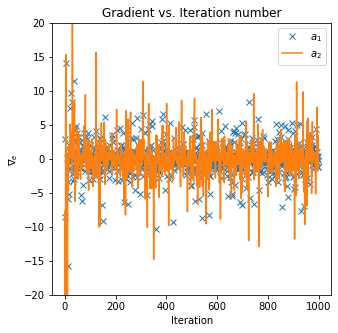

In [12]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, n_epochs*M), grad_hist[0,:], 'x', label='$a_1$')
plt.plot(np.arange(0, n_epochs*M), grad_hist[1,:], label='$a_2$')
plt.ylim([-20, 20])
plt.xlabel('Iteration')
plt.ylabel('$\\nabla_e$')
plt.title('Gradient vs. Iteration number')
plt.legend()
plt.show()

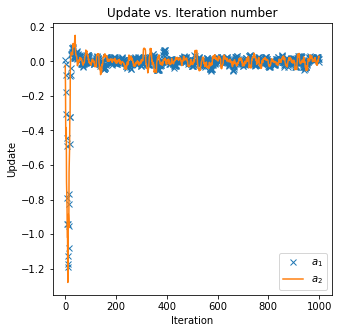

In [13]:
fig = plt.figure(figsize=(5,5))

plt.plot(np.arange(0, n_epochs*M), update_hist[0,:], 'x', label='$a_1$')
plt.plot(np.arange(0, n_epochs*M), update_hist[1,:], label='$a_2$')
plt.xlabel('Iteration')
plt.ylabel('Update')
plt.title('Update vs. Iteration number')
plt.legend()
plt.show()